In [0]:
import matplotlib.pyplot as plt
import pyspark.sql

In [0]:
# transform data for visualization setup
avg_duration_artist = spark.sql("""
    SELECT
    artist_name,
    avg(duration) AS avg_duration
    FROM
    prepared_data
    WHERE
    year>0
    GROUP BY
    artist_name
    ORDER BY
    avg_duration DESC
    LIMIT 20
""").toPandas()

avg_duration_artist

,artist_name,avg_duration
0,Rosendo,1648.587300
1,Revolutionary Ensemble,1581.948930
2,Mucky Pup,1577.377510
3,The Three Sounds,1553.188120
4,Fred Anderson Quartet,1512.463220
5,Bill Laswell,1476.884440
6,Richard Chartier,1441.606075
7,Montefeltro,1355.310570
8,Coogans Bluff,1327.437910
9,Shalabi Effect,1294.471380


In [0]:
# Data Validation Check
row = avg_duration_artist.count()[1]
if row>0:
    print(f"Data validation passed. {row} rows available.")
else:
    print("No data queried")

Data validation passed. 20 rows available.


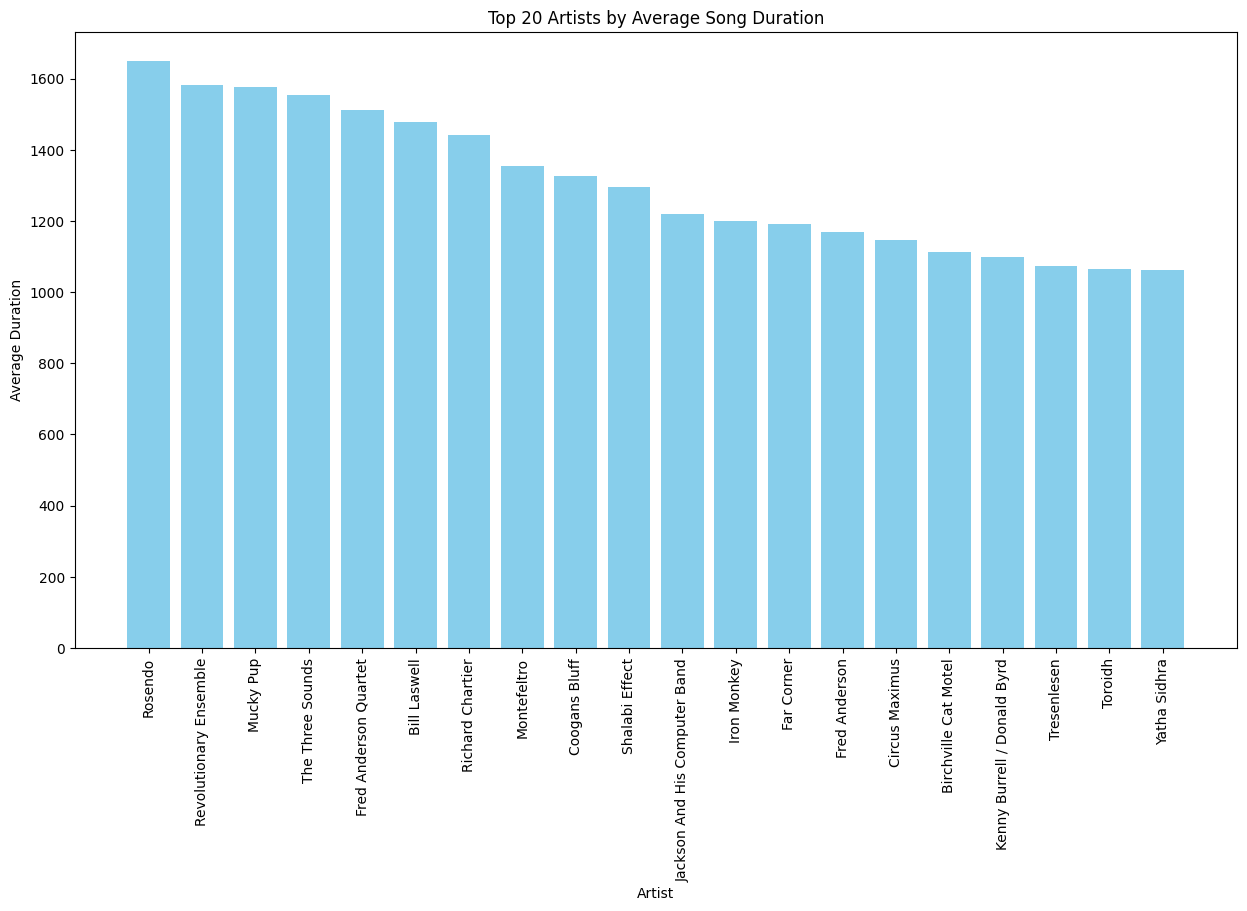

In [0]:
plt.figure(figsize=(15, 8))
plt.bar(avg_duration_artist["artist_name"], avg_duration_artist["avg_duration"], color='skyblue')
plt.title("Top 20 Artists by Average Song Duration")
plt.xlabel("Artist")
plt.ylabel("Average Duration")
plt.xticks(rotation=90)
plt.show()

In [0]:
# Another example transformation
top_artists=spark.sql("""
    SELECT
    artist_name,
    count(artist_name) AS num_songs,
    year
    FROM
    prepared_data
    WHERE
    year > 0
    GROUP BY
    artist_name,
    year
    ORDER BY
    num_songs DESC,
    year DESC
    LIMIT 5;
""").toPandas()

top_artists

,artist_name,num_songs,year
0,Beastie Boys,5,1994.0
1,Roebeck,4,2010.0
2,Maximo Park,4,2009.0
3,Darla Farmer,4,2009.0
4,Low Low Low La La La Love Love Love,4,2007.0


In [0]:
# Another example transformation
top_tempo=spark.sql(""" 
    SELECT
    artist_name,
    title,
    tempo
    FROM
    prepared_data
    WHERE
    time_signature = 4
    AND
    tempo between 100 and 140
    LIMIT 5;
""").toPandas()

top_tempo

,artist_name,title,tempo
0,Michael Johnathon,The Conversation (bonus track),137.777
1,Catastrofiks,Our Turn,116.895
2,Shania Twain,No One Needs To Know,138.135
3,Agnes,Non Conformist Acclaimed,122.965
4,Lange Presents Firewall,Sincere,137.927
